#Relatório 1 - Cálculo Numérico Computacional
##Nome: Guilherme Dallmann Lima
##Matricula: 19200035
##Turma: T2

#Importando as Bibliotecas

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sympy import *
import time
x = Symbol('x')
values = []



#Criação dos Métodos
*   Bissecção
*   Falsa Posição
*   Newton-Raphson
*   Secante
*   Show the Graphics

***Bissecção***

In [ ]:
# Bissecção

def metdBissec(function, a_0, b_0, precision):
  inicio = time.time()
  counter = 0
  if function(a_0)*function(b_0) >= 0:
    print("Método falhou")
    print("Quantidade de Interações Bissecção: ", counter)
    values.append(counter)
    fim = time.time()
    print("Tempo de exucção da função: ", fim - inicio)
    return None
  a_n = a_0
  b_n = b_0
  x_n = (a_0 + b_0)/2
  f = function(x_n)
  values.append(x_n)
  while (abs(function(x_n)) > precision):
    m = function(a_n)
    if(m * f > 0):
      a_n = x_n
    else:
      b_n = x_n
    counter = counter + 1
    x_n = (a_n + b_n) / 2
    f = function(x_n)
    values.append(x_n)

  print("Raiz encontrada: ", x_n)
  print("Quantidade de Interações Falsa posição: ", counter)
  fim = time.time()
  print("Tempo de exucção da função: ", fim - inicio)


***Falsa posição***

In [ ]:
# Falsa posição

def metdFalsePosition(function, a_0, b_0, precision):
  inicio = time.time()
  counter = 0
  if function(a_0)*function(b_0) >= 0:
    print("Método falhou")
    print("Quantidade de Interações Falsa Posição: ", counter)
    values.append(counter)
    fim = time.time()
    print("Tempo de exucção da função: ", fim - inicio)
    return None

  #if (b_0 - a_0) < precision:
	 # if (function(a_0) < precision) or (function(b_0) < precision):
    #  return b_0

  fa = function(a_0)
  fb = function(b_0)
  xLine = ((a_0 * fb) - (b_0 * fa)) / (fb - fa)
  fxLine = function(xLine)
  values.append(xLine)
  while(abs(fxLine) > precision):
    if(fa * fxLine > 0):
      a_0 = xLine
    else:
      b_0 = xLine
    fa = function(a_0)
    fb = function(b_0)
    xLine = ((a_0 * fb) - (b_0 * fa)) / (fb - fa)
    fxLine = function(xLine)
    values.append(xLine)
    counter = counter + 1
  print("Raiz encontrada: ", xLine)
  print("Quantidade de Interações Falsa posição: ", counter)
  fim = time.time()
  print("Tempo de exucção da função: ", fim - inicio)

***Newton-Raphson***

In [ ]:
# Newton-Raphson

def metdNewtons(f, function, x0, precision, interacoes):
    inicio = time.time()
    counter = 0
    if abs(x0) < precision:
       print("Valor X-Linha: ")
       print(x0)
       print("Quantidade de Interações Newton-Raphson: ", counter)
       values.append(counter)
       fim = time.time()
       print("Tempo de exucção da função: ", fim - inicio)
       return None
    derivada = diff(f, x, 1)
    counter = counter + 1
    functionLine = derivada.replace(x, x0)
    xLine = x0 - (function(x0) / functionLine)
    x0 = xLine
    fxLine = function(xLine)
    values.append(xLine)
    counter = counter + 1
    while (abs(fxLine) > precision) or (counter > interacoes):
      functionLine = derivada.replace(x, x0)
      xLine = x0 - (function(x0) / functionLine)
      x0 = xLine
      fxLine = function(xLine)
      values.append(xLine)
      counter = counter + 1
    print("Raiz encontrada: ", xLine)
    print("Quantidade de Interações Newton-Raphson: ", counter)
    fim = time.time()
    print("Tempo de exucção da função: ", fim - inicio)

***Secante***

In [ ]:
# Secante

def metdSecante(function, x0, x1, precision):
  inicio = time.time()
  counter = 0
  if abs(function(x0)) < precision:
    print("Resultado Final")
    print(x0)
    print("Quantidade de Interações Secante: ", counter)
    values.append(counter)
    fim = time.time()
    print("Tempo de exucção da função: ", fim - inicio)
    return None

  xLine0 = function(x0)
  xLine1 = function(x1)
  counter = counter + 1
  x2 = x1 - ((xLine1 * (x1 - x0)) / (xLine1 - xLine0))
  xLine2 = function(x2)
  counter = counter + 1
  x0 = x1
  x1 = x2
  values.append(x2)
  while abs(xLine2) > precision:
      xLine0 = function(x0)
      xLine1 = function(x1)
      x2 = x1 - ((xLine1 * (x1 - x0)) / (xLine1 - xLine0))
      xLine2 = function(x2)
      counter = counter + 1
      x0 = x1
      x1 = x2
      values.append(x2)
  print("Raiz encontrada: ", x2)
  print("Quantidade de Interações Secante: ", counter)
  fim = time.time()
  print("Tempo de exucção da função: ", fim - inicio)

***Show the Graphics***

In [ ]:
def showGraphics(function, initial, final, numberPoints, title, finalPoint=0):
  curva = np.linspace(initial, final, numberPoints)
  valores = [function(valor) for valor in curva]
  plt.title(title, fontsize=10)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.axhline(0, color='k')
  #plt.axvline(0, color='k')
  plt.plot(curva, valores, linestyle='-')
  #plt.plot(curva, valores, line)
  if finalPoint != 0:
    finalPoint = float("{:.10f}".format(finalPoint))
    curva_Two = np.linspace(finalPoint, finalPoint, 1)
    valores_Two = [function(valor) for valor in curva_Two]
    plt.plot(curva_Two, valores_Two, 'ro')
  plt.show()
  values.clear()

#Exercicios

#Questão 1

***1. A equação de Kepler, usada para determinar órbitas de satélites é dada por: M = x – E sen(x) . Dado que E = 0.2 e M = 0.5, obtenha a raiz da equação de Kepler usando o método da Bissecção. Considere a = 0.0, b = 2.0 e e = 10^-3***

Raiz encontrada:  0.615234375
Quantidade de Interações Falsa posição:  9
Tempo de exucção da função:  0.3832817077636719


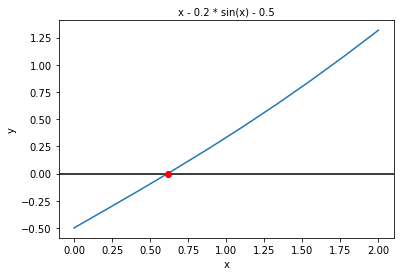

In [ ]:
question_One = lambda x : x - 0.2 * sin(x) - 0.5
metdBissec(question_One, 0, 2.0, 10**-3)
valor = values[len(values)-1]
showGraphics(question_One, 0, 2, 10, 'x - 0.2 * sin(x) - 0.5', valor)

#Questão 2

***2. Em problemas de fluxo em tubulações, é frequente precisar resolver a equação:
c5 D5 + c1 D + c0 = 0. Se c5 = 1000, c1 = −3 e c0 = 9.04, determine a raiz usando o método de Newton-Raphson. Considere x0 = -0.5 e e = 10-3***

Raiz encontrada:  -0.400000065802437
Quantidade de Interações Newton-Raphson:  5
Tempo de exucção da função:  0.04447007179260254


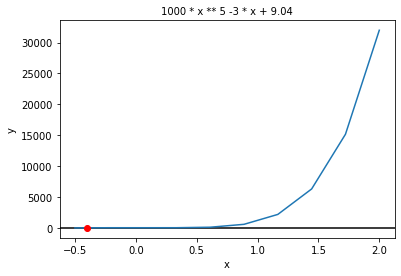

In [ ]:
derivade = 1000 * x ** 5 -3 * x + 9.04
question_Two = lambda x: 1000 * x ** 5 -3 * x + 9.04
metdNewtons(derivade, question_Two, -0.5, 10**-3, 1000)
valor = values[len(values)-1]
showGraphics(question_Two, -0.5, 2, 10, '1000 * x ** 5 -3 * x + 9.04', valor)

#Questão 3

***3. Em engenharia ambiental, a equação que se segue pode ser usada para calcular
o nível de oxigênio, c, existente num rio a jusante de um local de descarga de
esgoto, c = 10 − 15(e−0.1x − e−0.5x), em que x representa a distância a partir do local de descarga. Usando um método à sua escolha, determine o local (a partir da descarga) em que o nível de oxigênio atinge o valor 4. Considere [-1.0,1.0] e e = 10^-3***

Falsa Posição
Método falhou
Quantidade de Interações Falsa Posição:  0
Tempo de exucção da função:  0.0012238025665283203


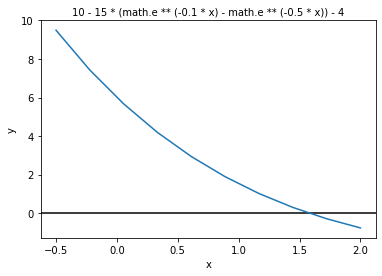

In [ ]:
function_Three = lambda x : 10 - 15 * (math.e ** (-0.1 * x) - math.e ** (-0.5 * x)) - 4
derivade_Two = 10 - 15 * (math.e ** (-0.1 * x) - math.e ** (-0.5 * x)) - 4


print("Falsa Posição")
metdFalsePosition(function_Three, -1.0, 1.0, 10**-3)
valor = values[len(values)-1]
showGraphics(function_Three, -0.5, 2, 10, '10 - 15 * (math.e ** (-0.1 * x) - math.e ** (-0.5 * x)) - 4')
print("")
print("")
print("")



***Método da Falsa Posição não encontrou a raiz no intervalo [-1.0,1.0] para a função c = 10 − 15(e−0.1x − e−0.5x).***

#Questão 4

***Determine a raiz real de f(x)= 2x4 + 4x3 + 3x2 – 10x – 15***

In [ ]:
function = lambda x : 2*x**4 + 4*x**3 + 3*x**2 - 10*x - 15
derivade = 2*x**4 + 4*x**3 + 3*x**2 - 10*x - 15

***a) Graficamente***


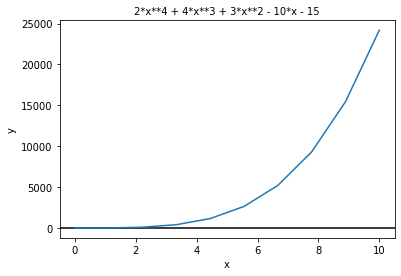

In [ ]:
showGraphics(function, 0, 10, 10, '2*x**4 + 4*x**3 + 3*x**2 - 10*x - 15')

***b) Usando o Método de Bissecção (e = 10-10, a = 0.0, b = 3.0)***

Bissecção
Raiz encontrada:  1.492878708664648
Quantidade de Interações Falsa posição:  37
Tempo de exucção da função:  0.0005793571472167969


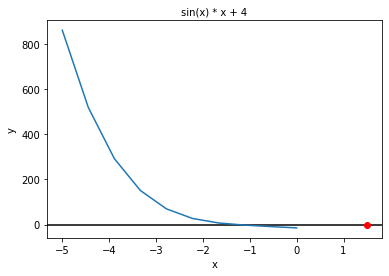

In [ ]:
# B)
print("Bissecção")
metdBissec(function, 0.0, 3.0, 10**-10)
valor = values[len(values)-1]
showGraphics(function, -5, 0, 10, 'sin(x) * x + 4', valor)

***c) Usando o Método da Falsa Posição(e = 10-10, a = 0.0 e b = 3.0)***

Falsa Posição
Raiz encontrada:  1.492878708662261
Quantidade de Interações Falsa posição:  77
Tempo de exucção da função:  0.0005922317504882812


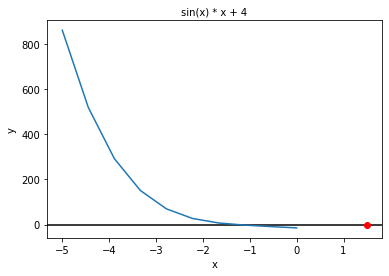

In [ ]:
#C)
print("Falsa Posição")
metdFalsePosition(function, 0.0, 3.0, 10**-10)
valor = values[len(values)-1]
showGraphics(function, -5, 0, 10, 'sin(x) * x + 4', valor)

***d) Usando o Método de Newton-Raphson (e = 10-10, x0 = 3.0)***

Newton-Raphson
Raiz encontrada:  1.49287870866360
Quantidade de Interações Newton-Raphson:  4
Tempo de exucção da função:  0.00934457778930664


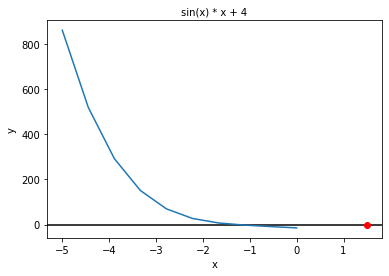

In [ ]:
#D
print("Newton-Raphson")
metdNewtons(derivade, function, 1.5, 10**-10, 1000)
valor = values[len(values)-1]
showGraphics(function, -5, 0, 10, 'sin(x) * x + 4', valor)


***e) Usando o Método da Secante (e = 10-10, x0 = 0.0 e x1 = 3.0)***


Secante
Raiz encontrada:  -1.300384132642908
Quantidade de Interações Secante:  11
Tempo de exucção da função:  0.0013518333435058594


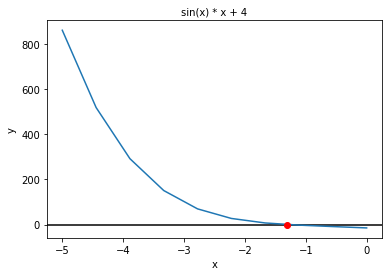

In [ ]:
#E
print("Secante")
metdSecante(function, 0.0, 3.0, 10**-10)
valor = values[len(values)-1]
showGraphics(function, -5, 0, 10, 'sin(x) * x + 4', valor)

***f) Compare e explique os resultados obtidos nas letras b, c, d, e (por exemplo: rapidez da convergência e esforço computacional)***

***R:*** De acordo com o tempo de execução e o número de iterações realizadas por cada método, o método que teve o melhor resultado foi a Secante, por conta da quantidade iterações realizadas e consequentemente um resultado mais acertivo devido á pouca perda de valores nas casas decimais, e o tempo de execução foi o menor entre os demais métodos.

#Questão 5

***Determine a raiz real de f(x)= sen(x) x + 4***


In [ ]:
function = lambda x: sin(x) * x + 4
derivade = sin(x) * x + 4

***a) Graficamente***

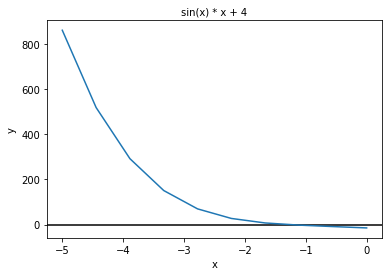

In [ ]:
showGraphics(function, -5, 0, 10, 'sin(x) * x + 4')

***b) Usando o Método de Bissecção (e = 10-10, a = 1.0, b = 5.0)***

Bissecção
Raiz encontrada:  4.323239543708041
Quantidade de Interações Falsa posição:  33
Tempo de exucção da função:  0.00928807258605957


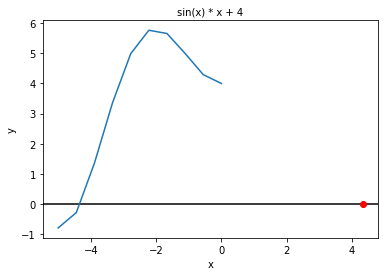

In [ ]:

# B)
print("Bissecção")
metdBissec(function, 1.0, 5.0, 10**-10)
valor = values[len(values)-1]
showGraphics(function, -5, 0, 10, 'sin(x) * x + 4', valor)

***c) Usando o Método da Falsa Posição(e = 10-10, a = 1.0 e b = 5.0)***

Falsa Posição
Raiz encontrada:  4.32323954373313
Quantidade de Interações Falsa posição:  8
Tempo de exucção da função:  0.003106832504272461


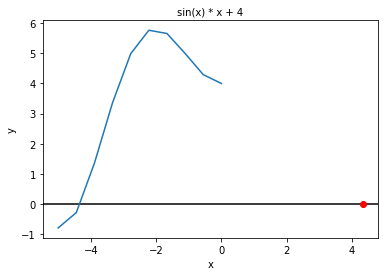

In [ ]:
#C)
print("Falsa Posição")
metdFalsePosition(function,  1.0, 5.0, 10**-10)
valor = values[len(values)-1]
showGraphics(function, -5, 0, 10, 'sin(x) * x + 4', valor)

***d) Usando o Método de Newton-Raphson (e = 10-10, x0 = 1.0)***

Newton-Raphson
Raiz encontrada:  -4.32323954371122
Quantidade de Interações Newton-Raphson:  6
Tempo de exucção da função:  0.01167750358581543


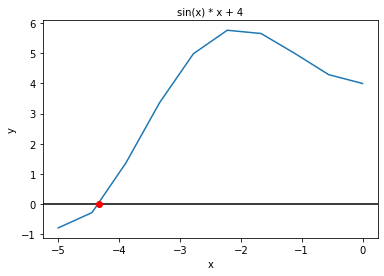

In [ ]:
#D
print("Newton-Raphson")
metdNewtons(derivade, function, 1.5, 10**-10, 1000)
valor = values[len(values)-1]
showGraphics(function, -5, 0, 10, 'sin(x) * x + 4', valor)

***e) Usando o Método da Secante (e = 10-10, x0 = 1.0 e x1 = 5.0)***

Secante
Raiz encontrada:  4.32323954371374
Quantidade de Interações Secante:  8
Tempo de exucção da função:  0.002150297164916992


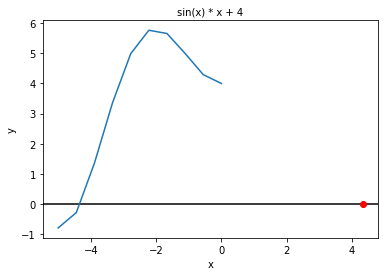

In [ ]:
#E
print("Secante")
metdSecante(function,  1.0, 5.0, 10**-10)
valor = values[len(values)-1]
showGraphics(function, -5, 0, 10, 'sin(x) * x + 4', valor)

***f) Compare e explique os resultados obtidos nas letras b, c, d, e (por exemplo: rapidez da convergência e esforço computacional)***

***R:*** De acordo com o tempo de execução e o número de iterações realizadas por cada método, o método que teve o melhor resultado foi a Falsa Posição, devido a pouca quantidade de iterações e o menor tempo de execução entre os demais métodos.